# **Attention**

Here we implement the **Self-Attention** function using PyTorch. Attention was introduced in the paper *Neural Machine Translation by Jointly Learning to Align and Translate* (2014) and was a core component of the paper *Attention Is All You Need* (2017), which paved the way for this new era of Machine Intelligence—including the revolutionary ChatGPT.

### What is Self-Attention?

Self-Attention allows a model to look at every word in a sentence and decide which other words are most relevant to understanding it. Currently considered "foundational," learning it is essential for building and researching in the modern era.

The function is represented as follows:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

Think it like searching a library:

| Symbol | Name | Role | Analogy |
|--------|------|------|---------|
| $Q$ | Query | "What I am looking for." | Your search question |
| $K$ | Key | "What I have to offer." | Book titles/tags |
| $V$ | Value | "What I actually contain." | The book contents |
| $d_k$ | Dimensions | The scaling factor | — |

We compare our **query** against all **keys** to get relevance scores, then use those scores to take a weighted combination of **values**. **We scale by $\sqrt{d_k}$?** in order to keep gradients "healthy" during training.


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.embed_dim = embed_dim
        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        """
        Forward pass for the self-attention mechanism.
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, seq_len, embed_dim]
        Returns:
            torch.Tensor: Output tensor of shape [batch_size, seq_len, embed_dim]
        """
        batch_size, seq_len, _ = x.shape
        
        Q = self.query(x) 
        K = self.key(x)
        V = self.value(x)
        
        
        scores = Q @ K.transpose(-2, -1) / (self.embed_dim ** 0.5) # Q * K^T / sqrt(d_k)
        
        
        mask = torch.tril(torch.ones(seq_len, seq_len))
        scores = scores.masked_fill(mask == 0, -float('inf'))
        
        attention_weights = F.softmax(scores, dim=-1) # softmax(Q * K^T / sqrt(d_k))
        output = attention_weights @ V # softmax(Q * K^T / sqrt(d_k)) * V
        
        return output, attention_weights
        

In [9]:
attention = SelfAttention(embed_dim=128)
x = torch.randn(4, 10, 128)
output, attention_weights = attention(x)


print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Attention weights shape: {attention_weights.shape}")
    

Input shape: torch.Size([4, 10, 128])
Output shape: torch.Size([4, 10, 128])
Attention weights shape: torch.Size([4, 10, 10])


In [10]:
detached_attn = attention_weights[0].detach().numpy()
tokens = ["The", "masjid", "is", "very", "crowded", "today", ".", "It's", "amazing", "."]



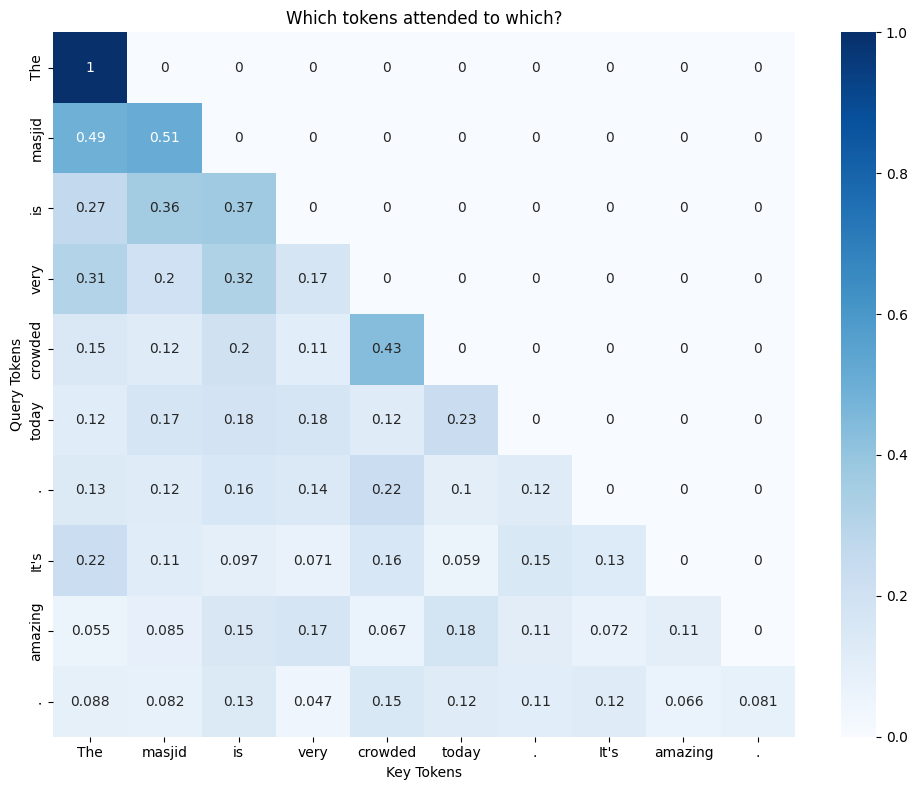

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    detached_attn,
    annot=True, 
    cmap="Blues", 
    xticklabels=tokens, 
    yticklabels=tokens
    )

plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.title("Which tokens attended to which?")
plt.tight_layout()
plt.show()




Key takeaways:

**What We Built**
- A complete single-head self-attention module with Q, K, V projections
- Causal (autoregressive) masking to prevent information leakage from future tokens
- Visualization of attention weights via heatmap

**Verification:**
- Input/output dimensions are preserved as expected: `[batch_size, seq_len, embed_dim]`
- The causal mask correctly zeros out the upper triangle, ensuring each token can only attend to itself and previous positions
- Attention weights sum to 1.0 across each row, confirming softmax is functioning properly
- The first token attends exclusively to itself (1.0), as expected.

**Visualization:**
The heatmap lacks a clear pattern because this is an *isolated, untrained* module. The Q, K, and V projection matrices contain random initial weights, therefore the model has no learned understanding of language yet. 


## References

1. Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, Ł., & Polosukhin, I. (2017). 
   **Attention Is All You Need.** *Advances in Neural Information Processing Systems, 30.* 
   [arXiv:1706.03762](https://arxiv.org/abs/1706.03762)

2. Bahdanau, D., Cho, K., & Bengio, Y. (2015). 
   **Neural Machine Translation by Jointly Learning to Align and Translate.** *ICLR 2015.* 
   [arXiv:1409.0473](https://arxiv.org/abs/1409.0473)